In [1]:
import requests, csv
from bs4 import BeautifulSoup
from os import path, listdir
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

import scripts.scraper as scraper
import scripts.data_preparation as data_preparation

# Data exploration

In [7]:
df = pd.read_csv('data/_all_reviews.csv', index_col=0)

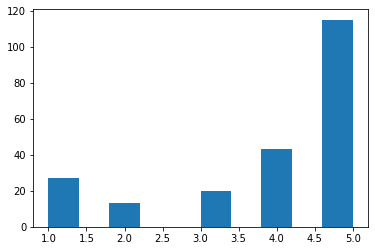

In [4]:
plt.hist(df['rating']);

In [8]:
df

,product,title,rating,text,preprocessed_title,preprocessed_text
0,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Trop bien,5,Je l ai reçu aujourd'hui et je m amuse comme u...,"['trop', 'bien']","['reçu', 'aujourdhui', 'amuse', 'comme', 'foll..."
1,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Top (je confirme stabilisateur sur objectif),5,Parfait pour la livraison toujours au top !Pou...,"['top', 'confirme', 'stabilisateur', 'objectif']","['parfait', 'livraison', 'toujours', 'top', 'c..."
2,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Parfait pour un débutant,5,Très bon appareil photo.Je recommande.,"['parfait', 'débutant']","['très', 'bon', 'appareil', 'photoje', 'recomm..."
3,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Bien content,5,Très content du produit.Revu ce jour plusieurs...,"['bien', 'content']","['très', 'content', 'produitrevu', 'jour', 'pl..."
4,Braun Series 7 Rasoir Électrique Homme À Grill...,"Très déçu, surtout pour le prix!! par rapport ...",3,"J'ai acheté ce rasoir pour mon fils, je dispos...","['très', 'déçu', 'surtout', 'prix', 'rapport',...","['jai', 'acheté', 'rasoir', 'fils', 'dispose',..."
...,...,...,...,...,...,...
213,"Kindle, maintenant avec un éclairage frontal i...",Mise à jour du commentaire après 3 ans d'utili...,3,Après seulement 3 ans d'utilisation (environ 2...,"['mise', 'jour', 'commentaire', 'après', 'ans'...","['après', 'seulement', 'ans', 'dutilisation', ..."
214,"Kindle, maintenant avec un éclairage frontal i...",C'est mon troisième Kindle. Je ne m'en lasse p...,5,"Comme ma maison est envahie de livres papier, ...","['cest', 'troisième', 'kindle', 'men', 'lasse']","['comme', 'maison', 'envahie', 'livres', 'papi..."
215,"Kindle, maintenant avec un éclairage frontal i...",Il fait vraiment passer le pas,5,Depuis toujours je suis accroc aux livres papi...,"['fait', 'vraiment', 'passer']","['depuis', 'toujours', 'accroc', 'livres', 'pa..."
216,"Kindle, maintenant avec un éclairage frontal i...","Super qualité, rien à redire",5,"Je l'ai acheté en vente flash, j'adore pour le...","['super', 'qualité', 'rien', 'redire']","['lai', 'acheté', 'vente', 'flash', 'jadore', ..."


# NLP

## Preprocessing

In [6]:
df.reset_index(drop=True)

,Unnamed: 0,product,title,rating,text,preprocessed_title,preprocessed_text
0,0,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Trop bien,5,Je l ai reçu aujourd'hui et je m amuse comme u...,"['trop', 'bien']","['reçu', 'aujourdhui', 'amuse', 'comme', 'foll..."
1,1,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Top (je confirme stabilisateur sur objectif),5,Parfait pour la livraison toujours au top !Pou...,"['top', 'confirme', 'stabilisateur', 'objectif']","['parfait', 'livraison', 'toujours', 'top', 'c..."
2,2,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Parfait pour un débutant,5,Très bon appareil photo.Je recommande.,"['parfait', 'débutant']","['très', 'bon', 'appareil', 'photoje', 'recomm..."
3,3,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Bien content,5,Très content du produit.Revu ce jour plusieurs...,"['bien', 'content']","['très', 'content', 'produitrevu', 'jour', 'pl..."
4,4,Braun Series 7 Rasoir Électrique Homme À Grill...,"Très déçu, surtout pour le prix!! par rapport ...",3,"J'ai acheté ce rasoir pour mon fils, je dispos...","['très', 'déçu', 'surtout', 'prix', 'rapport',...","['jai', 'acheté', 'rasoir', 'fils', 'dispose',..."
...,...,...,...,...,...,...,...
213,213,"Kindle, maintenant avec un éclairage frontal i...",Mise à jour du commentaire après 3 ans d'utili...,3,Après seulement 3 ans d'utilisation (environ 2...,"['mise', 'jour', 'commentaire', 'après', 'ans'...","['après', 'seulement', 'ans', 'dutilisation', ..."
214,214,"Kindle, maintenant avec un éclairage frontal i...",C'est mon troisième Kindle. Je ne m'en lasse p...,5,"Comme ma maison est envahie de livres papier, ...","['cest', 'troisième', 'kindle', 'men', 'lasse']","['comme', 'maison', 'envahie', 'livres', 'papi..."
215,215,"Kindle, maintenant avec un éclairage frontal i...",Il fait vraiment passer le pas,5,Depuis toujours je suis accroc aux livres papi...,"['fait', 'vraiment', 'passer']","['depuis', 'toujours', 'accroc', 'livres', 'pa..."
216,216,"Kindle, maintenant avec un éclairage frontal i...","Super qualité, rien à redire",5,"Je l'ai acheté en vente flash, j'adore pour le...","['super', 'qualité', 'rien', 'redire']","['lai', 'acheté', 'vente', 'flash', 'jadore', ..."


In [7]:
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [4]:
def rating_to_int(rating):
    if rating in [5., 4., 3., 2., 1.]:
        return int(rating)
    else:
        print('error')
        return rating

In [5]:
df['rating'] = df['rating'].apply(rating_to_int)

NameError: name 'df' is not defined

In [5]:
def preprocess(text):
    """returns preprocessed text"""
    
    # lowercase
    text = text.lower()
    
    # number
    text = ''.join(word for word in text if not word.isdigit())
    
    # punctuation
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '') 
    
    # stopwords
    stop_words = set(stopwords.words('french'))
    word_tokens = word_tokenize(text)
    text = [w for w in word_tokens if not w in stop_words]
    
    # tokenizing
    #stemmer = PorterStemmer()
    #stemmed = [stemmer.stem(word) for word in text]
    
    return text

In [8]:
df['preprocessed_title'] = df['title'].apply(preprocess)
df['preprocessed_text'] = df['text'].apply(preprocess)

In [9]:
df.head()

,product,title,rating,text,preprocessed_title,preprocessed_text
0,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Trop bien,5,Je l ai reçu aujourd'hui et je m amuse comme u...,"[trop, bien]","[reçu, aujourdhui, amuse, comme, folle, grand,..."
1,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Top (je confirme stabilisateur sur objectif),5,Parfait pour la livraison toujours au top !Pou...,"[top, confirme, stabilisateur, objectif]","[parfait, livraison, toujours, top, commande, ..."
2,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Parfait pour un débutant,5,Très bon appareil photo.Je recommande.,"[parfait, débutant]","[très, bon, appareil, photoje, recommande]"
3,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Bien content,5,Très content du produit.Revu ce jour plusieurs...,"[bien, content]","[très, content, produitrevu, jour, plusieurs, ..."
0,Braun Series 7 Rasoir Électrique Homme À Grill...,"Très déçu, surtout pour le prix!! par rapport ...",3,"J'ai acheté ce rasoir pour mon fils, je dispos...","[très, déçu, surtout, prix, rapport, modèle, d...","[jai, acheté, rasoir, fils, dispose, déjà, dun..."
